<div>
<img src="mini-dataset/a1.png", width=32, ALIGN="left">
<center>
<h1>Mini Projets 2019-2020 (Info 232)</h1>
Isabelle Guyon <br>
info232@chalearn.org <br>
</center>
<span style="color:red"> <h1> 1 . Workflow </h1> </span>
    
<p> Become a data scientist is one hour: learn about the basic workflow of data science:
    <ol>
        <li> Visualisation </li>
        <li> Metric definition </li>
        <li> Baseline results </li>
        <li> Error bars </li>
    </ol>
    </p>
</div>
<div style="background:#FFFFAA">
 This TP gives you 5 points if you answer well at least 5 questions. However we encourage you answer all questions: they are meant to give you ideas you can use later in your projects. If you cannot, get help by attending the Wednesday session.
    
<span style="color:red"> <b>Save your notebook often with menu File + Save and Checkpoint.</b>
<br> <b>Before you push your homework to your GitHub repo, use  Kernel + Restart and Run all.</b>
</span>
    </div>

In [1]:
# Load general libraries
import os, re
from glob import glob as ls
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Add path to the sample code so the notebook finds it:
code_dir = 'code/'                        
from sys import path; path.append(code_dir)
#import utilities as ut
from utilities import get_image
from utilities import get_files
# Import code that checks your answers
from checker import check 
# Disable some warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

<div style="background:#FFFFAA"> <h1> Step 1: Data visualisation and preprocessing </h1>
    </div>
    
<p>
This first part guides you through a example of reading and preprocessing a small image dataset. Read the code below and try to understand it.
    </p>

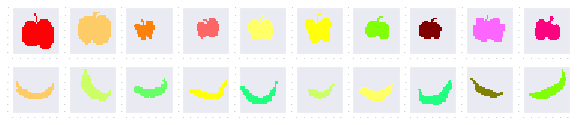

In [2]:
data_dir = './mini-dataset'
a_files = get_files(data_dir, 'a')
b_files = get_files(data_dir, 'b')
columns = 10
rows = len(a_files+b_files)/columns
fig = plt.figure(figsize=(columns, rows))
k=1
for filename in a_files+b_files:
    img = get_image(filename)
    fig.add_subplot(rows, columns, k)
    plt.imshow(img) 
    plt.tick_params(axis='both', labelsize=0, length = 0)
    plt.grid(b=False)
    k=k+1

## Feature extraction
Data often comes already in a feature representation, but not always. As an exercise, we are going to guide you through a simple feature extraction process.

### Question 1: Load an image

1. Create a variable called `apple_example` and assign it the name of the first file in the list `a_files`. 
2. Create a variable `img` and assign it the corresponding image read from that file using the function `get_image`. 

`img` is a PIL image. PIL is a nice library to manipulate images, but data scientists often prefer using Numpy arrays. Fortunately it is easy to convert one to the other. 

3. Create a variable called `M` and assign it a <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html">numpy array</a> containing `img` (this is called "casting"). Assign to three variables `imw`, `imh`, `nchannels` the dimensions (<a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html">shape</a>) of `M`. 
4. Then print `imw`, `imh`, and `nchannels`. 

You will notice that there are 4 channels, what are those channels? Try to remember or check your class notes.

Tip: To answer this kind of question, you need to read the documentation of numpy arrays.

32 32 4


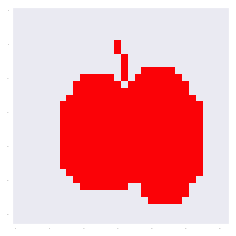

In [3]:
### Answer question 1
question = 1
import numpy as np         # This is needed to import Numpy
apple_example = a_files[0]
img = get_image(apple_example)
M = np.array(img)
imw, imh, nchannels = M.shape

print(imw, imh, nchannels)
plt.imshow(M) # This shows the image as a numpy array
plt.tick_params(axis='both', labelsize=0, length = 0)
plt.grid(b=False)

# This is the checker code, keep it
answer = int.from_bytes(apple_example.encode('utf-8'), "little")+imw * imh + nchannels  
score = 0
score += check(answer, question)


### Foreground and background colors
The variable `white` has the color of pure white and a variable `red`the color of pure red (with transparency set to 255 in both cases).

We can examine the colors of the foreground and the background as the channel values of `M[15, 15]`and `M[0, 0]` respectively. Do the color of the foreground and the background match your expectations?

In [4]:
white = [255, 255, 255, 255]
red = [255, 0, 0, 255]
print("White = {}".format(white))
print("red = {}".format(red))
print("Foreground = {}".format(M[15, 15]))
print("Background = {}".format(M[0, 0]))

White = [255, 255, 255, 255]
red = [255, 0, 0, 255]
Foreground = [251   2   7 255]
Background = [255 255 255   0]


### Question 2: Separate color channels

1. Define three arrays of type `float` named `R`, `G`, and `B`, containing the red, green and blue channels respectively (for all pixels)
2. Then define an array `D` (color difference) containing `R-(G+B)/2` 
3. and an array `V` (value of intensity) containing `(R+G+B)/3`.

Important: R, G, and B should be transformed to float to get correct results.

In [5]:
### Answer to question 2
question = 2
R = np.array(M[:,:,0], dtype = float)
G = np.array(M[:,:,1], dtype = float)
B = np.array(M[:,:,2], dtype = float)
D = R-(G+B)/2
V = (R+G+B)/3

# This is the checker code, keep it
answer = np.sum(np.diag(D+V))
score += check(answer, question)

### Question 3: Extraction of the `redness` feature

1. Create a variable `redness` containing the average (mean) of `D` for the foreground pixels.

Hint: The can be done by selecting the foreground pixels, i.e. those that are not `255` (white). You can do that with just one <a href="https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/BasicIndexing.html"> advanced indexing</a> command.

2. Check that your definition of redness matches `fg_r - (fg_g + fg_b)/2`. 
3. As a side question: try to define `whiteness = bg_r - (bg_g + bg_b)/2`. 
    1. Why do you get an error? 
    2. Why did you get no error for `fg_r - (fg_g + fg_b)/2`? 
    3. How can you do this "right"? Hint: rgb channels are defined as `integers`.

In [6]:
### Answer to question 3
question = 3
redness = D[np.where(M[:,:,3] == 255, D, 0).nonzero()].mean()

print(redness)
# This checks the correctness of your answer
fg_r, fg_g, fg_b, fg_a = M[15, 15]
assert(redness == fg_r - (fg_g + fg_b)/2)
bg_r, bg_g, bg_b, bg_a = M[0, 0]
# Uncomment this to see that you get an error
#whiteness = bg_r - (bg_g + bg_b)/2

# This is the checker code, keep it
answer = redness
score += check(answer, question)

246.5


### Question 4: Extraction of the `elongation` feature

1. Create two mean vectors `V0` and `V1` by averaging (taking the mean) of `V` along axis 0 and axis 1 respectively. 
2. Then use this line of code `V0_idx = [i for i in range(imw) if V0[i]!=255]` to get the indices of the values that are not white along axis 0 (horizontal). 
3. Similarly write code to extract `V1_idx` (pixels not white along axis 2, vertical).
4. Extract from those information on the witdth `w` and the height `h` of the apple. 
5. Visually check that the width and height are correct. Finally compute the `elongation` variable (aspect ratio) as `w/h`.

In [7]:
### Answer to question 4
question = 4

V0 = np.mean(V, axis = 0)
V1 = np.mean(V, axis = 1)
V0_idx = [i for i in range(imw) if V0[i]!=255]
V1_idx = [i for i in range(imh) if V1[i]!=255]
w = abs(V0_idx[0] - V0_idx[-1]) + 1
h = abs(V1_idx[0] - V1_idx[-1]) + 1
elongation = w / h 

print(w, h, elongation)

# This is the checker code, keep it
answer = w+h-elongation
score += check(answer, question)

21 24 0.875


### Question 5: Function `extract_features`

1. Write a function with `M` as an input argument and that takes all the steps we walked you through, then returns `redness` and `elongation` as a list. You will use the following template:

```python
def extract_features(M, verbose = True):
# Put your code here.
# verbose is just a flag you can use to comment out print statements needed to debug your code
return [redness, elongation]
```

In [8]:
### Answer to question 5
question = 5

def extract_features(M, verbose = True):
    R = np.array(M[:,:,0], dtype = float)
    G = np.array(M[:,:,1], dtype = float)
    B = np.array(M[:,:,2], dtype = float)
    D = R-(G+B)/2
    V = (R+G+B)/3
    redness = np.mean(D)
    
    V0 = np.mean(V, axis = 0)
    V1 = np.mean(V, axis = 1)
    V0_idx = [i for i in range(imw) if V0[i]!=255]
    V1_idx = [i for i in range(imh) if V1[i]!=255]
    w = max(V0_idx) - min(V0_idx)
    h = max(V1_idx) - min(V1_idx)
    elongation = w / h 
    
    return [redness, elongation]

## Preprocess and visualize all the data
To go a little bit faster, we give you the code to preprocess all the dataset in the next few cells. Check that you understand it.

In [9]:
# Create a big data matrix with all a_files and b_files
verbose = False
n = len(a_files)
_X = np.zeros([2*n, 2])
Y = np.zeros([2*n, 1])

# Read and convert a_files
for i in range(n):
    if verbose: print(a_files[i])
    img = get_image(a_files[i])
    M = np.array(img)
    _X[i, :] = extract_features(M, verbose)
    Y[i] = 1 # Apples are labeled 1

# Read and convert b_files
for i in range(n):
    if verbose: print(b_files[i])
    img = get_image(b_files[i])
    M = np.array(img)
    _X[n+i, :] = extract_features(M, verbose)
    Y[n+i] = -1 # Bananas are labeled -1

# This is the checker code for question 5, keep it
answer = np.sum(_X[1,:])+ np.sum(_X[-1,:])
score += check(answer, question)

## Pandas data frames, heatmaps, and pairplot
We already used Pandas dataframes in TP0. Data scientists like them too. Fortunately it is easy to move back and forth from Numpy arrays to Pandas dataframes. Pandas allows you to easily show arrays as heat maps.

Sometimes datasets are large. You can create a heat map from the top row of your data frame with a command like `_XY.head().style.background_gradient(cmap='Blues')`. Try it!

In [10]:
import pandas as pd
column_names = ['redness', 'elongation', 'fruit']
_XY = pd.DataFrame(np.append(_X, Y, axis=1), columns=column_names)
_XY.style.background_gradient(cmap='Blues')

,redness,elongation,fruit
0,84.0122,0.869565,1
1,37.7764,1,1
2,21.8604,1,1
3,22.5586,1.07692,1
4,14.9414,0.888889,1
5,27.9932,0.894737,1
6,-0.563965,1.07143,1
7,18.9756,1.07692,1
8,20.0259,1.17647,1
9,35.0566,1.06667,1


There is another way of making heatmaps that we showed you last time using Seaborn. Check the <a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html">searborn heatmap documentation</a> to figure out how to add annotations and change the color map.
1. Try to make it look just like the one shown in class. 
2. Why are the colors in the second column so poorly contrated when you use seaborn heatmaps compared to the first method we showed to display Pandas dataframes as heatmaps?

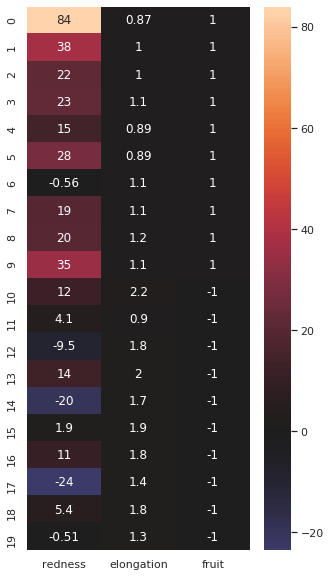

In [11]:
import seaborn as sns; sns.set()
fig = plt.figure(figsize=(5,10))
# Put your code here the create a seaborn heat map 
# looking like the one shown in class
sns.heatmap(_XY, annot=True, center=0)

### Question 6: Feature standardization
For better rendering and improved results, the features are often standardized. This means that for each column, we subtract the mean and divide by the standard deviation (except for the target).

From the previous TP, do you remember some of the Pandas useful functions like `describe`? This allows you to quickly get statistics about your dataset. You can also use `mean` and `std`. Provide the mean and standard deviation of the features before and after standardization. Observe the effect of standardization on the heat map.

         redness  elongation      fruit
count  20.000000   20.000000  20.000000
mean   13.864404    1.339142   0.000000
std    23.147765    0.430912   1.025978
min   -23.527344    0.869565  -1.000000
25%     1.292969    1.000000  -1.000000
50%    13.043213    1.126697   0.000000
75%    22.034912    1.750000   1.000000
max    84.012207    2.181818   1.000000
            redness    elongation      fruit
count  2.000000e+01  2.000000e+01  20.000000
mean  -1.110223e-17  9.298118e-17   0.000000
std    1.025978e+00  1.025978e+00   1.025978
min   -1.657314e+00 -1.118037e+00  -1.000000
25%   -5.572037e-01 -8.074793e-01  -1.000000
50%   -3.639767e-02 -5.058212e-01   0.000000
75%    3.621414e-01  9.782290e-01   1.000000
max    3.109161e+00  2.006364e+00   1.000000
** BEFORE **
redness: mean=13.86, std=23.15
elongation: mean= 1.34, std= 0.43
** AFTER **
redness: mean=-0.00, std= 1.03
elongation: mean= 0.00, std= 1.03


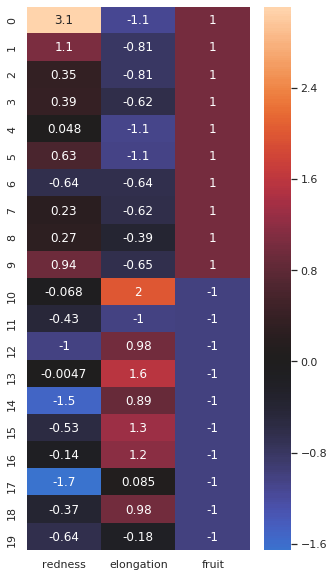

In [12]:
question = 6

# The library scikit-learn (sklearn) provides you code to standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X = scaler.fit_transform(_X)
XY = pd.DataFrame(np.append(X, Y, axis=1), columns=['redness', 'elongation', 'fruit'])
print(_XY.describe())
print(XY.describe())

# Change this code to make this heatmap look like the one in class
fig = plt.figure(figsize=(5,10))
sns.heatmap(XY, annot=True, center=0)

# Put your answers to question 6 here
redness_mean_before, elongation_mean_before = 13.864404, 1.339142
redness_std_before, elongation_std_before = 23.147765  ,  0.430912
redness_mean_after, elongation_mean_after = -1.110223e-17, 9.298118e-17
redness_std_after, elongation_std_after = 1.025978, 1.025978

print("** BEFORE **")
print("redness: mean={0:5.2f}, std={1:5.2f}".format(redness_mean_before, redness_std_before))
print("elongation: mean={0:5.2f}, std={1:5.2f}".format(elongation_mean_before, elongation_std_before))
print("** AFTER **")
print("redness: mean={0:5.2f}, std={1:5.2f}".format(redness_mean_after, redness_std_after))
print("elongation: mean={0:5.2f}, std={1:5.2f}".format(elongation_mean_after, elongation_std_after))

# This is the checker code for question 6, keep it
answer = redness_mean_before+elongation_mean_before+redness_std_before+elongation_std_before
answer = answer - (redness_mean_after+elongation_mean_after+redness_std_after+elongation_std_after)
score += check(answer, question)

### Pairplots
Last time we also visualized data as pairplot, here is the pairplot of this dataset.

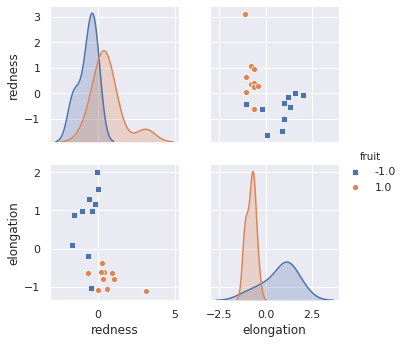

In [13]:
sns.pairplot(XY, vars=['redness', 'elongation'], hue='fruit', markers=["s", "o"])
plt.show()

### Correlation matrix

In [ ]:
corr_mat = XY.corr(method='pearson')
sns.heatmap(abs(corr_mat), annot=True, center=0)
plt.show()

### Question 7: Feature selection
Based on the pair plots and the correlation matrix:
    - Which feature separates best the two fruit categories? 
    - Are the two features correlated or anti-correlated?

In [ ]:
question = 7

number_of_best_feature = -1      # 0 for redness and 1 for elongation
correlation_between_features = 0 # 1 for correlated and -1 for anti-correlated

# This is the checker code for question 7, keep it
answer = (1+ number_of_best_feature) * correlation_between_features
score += check(answer, question)

Note: For simplicity and because the dataset is tiny, we showed the feature standardization and feature selection steps on the whole dataset. However, those steps should normally be performed on training data first and then applied to test data.

<div style="background:#FFFFAA"> <h1> Step 2: Metric definition </h1></div>

### Question 8: Error rate and accuracy score

1. Write a function that implements the error rate metric. Follow this template:

```python
def error_rate(solution, prediction):
# Put your code here.
return e
```
    
2. Then write unit tests using the function `assert` that :
    1. check that the error rate between `solution=Y` and `prediction=Y` is zero, 
    2. that between `solution=Y` and `prediction=np.zeros(Y.shape)` is one 
    3. and the between `solution=Y` and `prediction=np.ones(Y.shape)` is 0.5.

In [ ]:
### Answer to question 8
question = 8

def error_rate(solution, prediction):
    '''Compute the error rate between two vectors.'''
    e = 0
    return e

# This is the checker code for question 8, keep it
answer = error_rate(Y, Y) + error_rate(Y, np.zeros(Y.shape)) + error_rate(Y, np.ones(Y.shape))
score += check(answer, question)

The library `scikit_learn` also called `sklearn` has a function `accuracy_score` = `1-error_rate`. You can verify below that we get the same results on the unit tests proposed above. There are many <a href="https://scikit-learn.org/stable/modules/model_evaluation.html">sklearn metrics</a>, we invite you to check them out.

In [ ]:
from sklearn.metrics import accuracy_score
#assert(error_rate(Y, Y) == 1-accuracy_score(Y, Y))
#assert(error_rate(Y, np.zeros(Y.shape)) == 1-accuracy_score(Y, np.zeros(Y.shape)))
#assert(error_rate(Y, np.ones(Y.shape)) == 1-accuracy_score(Y, np.ones(Y.shape)))

### Question 9: The metric of your challenge
The challenge you have chosen uses a particular metric. The metrics were chosen among: "balanced_accuracy", "balanced_error_rate", "auc_metric", "f1_score", "mean_absolute_error", and "r2_metric". Two important metrics to understand are the AUC (area under <a href="https://en.wikipedia.org/wiki/Receiver_operating_characteristic">ROC curve</a> and the "r2-metric" or <a href="https://en.wikipedia.org/wiki/Coefficient_of_determination">coefficient of determination</a>.

Click on the <a href="http://saclay.chalearn.org/">websites of this year challenges</a> and go to the "Evaluation" tab. Find what the metrics are. Learn about the metric of your own challenge.

In [ ]:
### Answer to question 9
question = 9

gaiasavers_metric = " "
xporters_metric = " "
medichal_metric = " "

# This is the checker code for question 9, keep it
my_string = gaiasavers_metric+xporters_metric+medichal_metric
answer = int.from_bytes(my_string.encode('utf-8'), "little")  

score += check(answer, question)

<div style="background:#FFFFAA"> <h1> Step 3: Baseline results </h1></div>
<p>
We are now equipped to try some basic machine learning method to predict what fruit is shown on an image, based on "redness" and "elongation". We will again use `scikit-learn`. We will split the data into a training set and a test set and see how well we do with the nearest neighbor method. </p>

In [ ]:
# Make one training-test split in a stratified manner. 
# "Stratified" means that we preserve the proportion of examples
# of apples and bananas in the training and the test set.
from sklearn.model_selection import StratifiedShuffleSplit

SSS = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)
for train_index, test_index in SSS.split(X, Y):
    print("TRAIN:", train_index, "TEST:", test_index)
    Xtrain, Xtest = X[train_index], X[test_index]
    Ytrain, Ytest = Y[train_index], Y[test_index]

In [ ]:
# Show the training set (first line) and the test set (second line)
columns = 10
rows = len(a_files+b_files)/columns
fig = plt.figure(figsize=(columns, rows))
F = np.array(a_files + b_files)
for k, filename in enumerate(np.concatenate((F[train_index],F[test_index])), start=1):
    img = get_image(filename)
    fig.add_subplot(rows, columns, k)
    plt.imshow(img) 
    plt.tick_params(axis='both', labelsize=0, length = 0)
    plt.grid(b=False)


In [ ]:
# Plot training and test data as heat maps:
# (We show the whole code for inspiration...)
XY_train = pd.DataFrame(np.append(Xtrain, Ytrain, axis=1), columns=['redness', 'elongation', 'fruit'])
XY_test = pd.DataFrame(np.append(Xtest, Ytest, axis=1), columns=['redness', 'elongation', 'fruit'])

fig =  plt.figure(figsize=(5,5))
fig.subplots_adjust(wspace=1)
ax_train = fig.add_subplot(1, 2, 1)
sns.heatmap(XY_train, annot=True, fmt='.1f', cmap='RdYlGn')
ax_train.title.set_text('Training')

ax_test = fig.add_subplot(1, 2, 2)
sns.heatmap(XY_test, annot=True, fmt='.1f', cmap='RdYlGn')
ax_test.title.set_text('Test')

In [ ]:
# Our own kind of scatter plot...
from utilities import make_scatter_plot

# Check that this is the same as what we get with pair plots.
make_scatter_plot(X, F, train_index, test_index)

### Question 10: One nearest neighbor
The 1-nearest neighbor classifier is a nice and simple method. Luckily it is implemented in `scikit-learn`. You may also want to implement it yourself as part of your project.

1. Import the `KNeighborsClassifier` classifier from `scikit-learn`. 
2. Instanciate a classifier of that class and set the number of neighbors to one. 
3. Train a model with `Xtrain` by calling the method `fit`. 
4.  Then use the trained model to create two vectors of prediction `Ytrain_predicted` and `Ytest_predicted` by calling the method `predict`. 
5. Compute `e_tr`, the training error rate, and `e_tr` the test error rate.

**WARNING:** `scikit-learn` uses lists for prediction labels instead of column vectors. You will have to replace `Ytrain` by `Ytrain.ravel()` and `Ytest` by `Ytest.ravel()` to avoid an error message and wrong error rates.

In [ ]:
### Answer to question 10
question = 10

### Put your code here
Ytrain_predicted = np.ones(Ytrain.shape).ravel()
Ytest_predicted = np.ones(Ytest.shape).ravel()
e_tr = 0.5
e_te = 0.5

# This is the checker code for question 10, keep it
print(e_tr, e_te)
answer = e_tr + e_te
score += check(answer, question)

### Confusion matrix
We can also extract the variables `tn`, `fp`, `fn`, `tp` (true negative, false positive, false negative, and true positive) using the `confusion_matrix` function of `scikit_learn`, for test data predictions. With these values, you can calculate the balanced error rate (`BER`) using the formula seen in class and verify that it gives the same result as `1-balanced_accuracy`.

We also provide in `utilities.py` the function `plot_confusion_matrix`, which is in the latest version of scikit-learn (not necessarily in the one you have).

In [ ]:
from sklearn.metrics import confusion_matrix
from utilities import plot_confusion_matrix

tn, fp, fn, tp = confusion_matrix(Ytest.ravel(), Ytest_predicted).ravel()
print("TP={}, FP={}, FN={}, TP={}".format(tn, fp, fn, tp))
print("Balanced error rate as 0.5*(fp/(tn+fp)+fn/(tp+fn))= {}".format(0.5*(fp/(tn+fp)+fn/(tp+fn))))
print("Balanced error rate as 1-balanced_accuracy = {}".format(1-accuracy_score(Ytest.ravel(), Ytest_predicted)))

class_names = np.array(["apple", "banana"])
# Plot non-normalized confusion matrix
plot_confusion_matrix(Ytest.ravel(), Ytest_predicted, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

# Plot normalized confusion matrix
plot_confusion_matrix(Ytest.ravel(), Ytest_predicted, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()


### Let's overlay the predictions on the scatter plot ...

In [ ]:
make_scatter_plot(X, F, train_index, test_index, predicted_labels=Ytest_predicted)

### ... then show the "ground truth"
We see that there is one apple that was classified as a banana (i.e. one "false negative" since the banana class is the "negative" class.

In [ ]:
make_scatter_plot(X, F, train_index, test_index, predicted_labels='GroundTruth')

<div style="background:#FFFFAA"> <h1> Step 4: Error bar </h1></div>
<p>
    To compute the error bar we repeat multiple times the train/test split and compute the mean and standard deviation of the test error. This takes into account both the variability of the training set and that of the test set. But is is known to be a biased estimator of the error variability because there is a large overlap between the training sets and the test sets in each split. However, it is pretty much the best we can do to compute error bars.
    </p>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
n = 10
SSS = StratifiedShuffleSplit(n_splits=n, test_size=0.5, random_state=5)
E = np.zeros([n,1])
k = 0
for train_index, test_index in SSS.split(X, Y):
    print("TRAIN:", train_index, "TEST:", test_index)
    Xtrain, Xtest = X[train_index], X[test_index]
    Ytrain, Ytest = Y[train_index], Y[test_index]
    neigh.fit(Xtrain, Ytrain.ravel()) 
    Ytrain_predicted = neigh.predict(Xtrain)
    Ytest_predicted = neigh.predict(Xtest)
    e_te = error_rate(Ytest.ravel(), Ytest_predicted)
    print("TEST ERROR RATE:", e_te)
    E[k] = e_te
    k = k+1
    
e_te_ave = np.mean(E)
print("\n\nMEAN ERROR RATE ={0:5.2f}".format(e_te_ave))
print("STANDARD DEVIATION ={0:5.2f}".format(np.std(E)))

In [ ]:
print('Your final score is %d / 10, congratulations!' % score)

<div style="background:#FFFFAA">
<span style="color:red">
<br>
    To finalize your homework:
<b>
<ul>
    <li> Use  Kernel + Restart and Run all.</li>
    <li> Save your notebook.</li>
    <li> Push your changes to your GitHub repo with:</li>
</ul>   
</b>
<pre>
git add .
git commit -m 'my homework is done'
git push
</pre>
<br>
</span>
</div>